In [31]:

names = ['FRC' 'PNC' 'USB' 'JPM' 'BAC' 'C' 'RY' 'WFC' 'GS' 'MS' 'HSBC' 'JNJ' 'PFE' 'MRK' 'XOM' 'RDS' 'CVS' 'BP' 'AAPL' 'GOOG' 'MSFT' 'BABA' 'TSLA' 'AMZN' '^GSPC']

In [42]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [43]:
import yfinance as yf
quotes = yf.download("FRC PNC USB JPM BAC C RY WFC GS MS HSBC JNJ PFE MRK XOM RDS CVS BP AAPL GOOG MSFT BABA TSLA AMZN ^GSPC", start="2000-01-01", end="2020-04-30")

[*********************100%***********************]  25 of 25 completed


In [44]:
close_P = quotes['Close']

In [45]:
data = close_P.pct_change()

In [46]:
import numpy as np
import pandas as pd
WEEKLY_DFS = []

for i in range(len(data.columns)):
    firm = data.columns[i]
    RET = data[firm].dropna(axis=0)
    RET_weekly = (RET+1).resample('W').prod() - 1 # Convert daily data to weekly
    WEEKLY_DFS.append(RET_weekly)

len_WEEKLY_DFS = np.array([len(temp) for temp in WEEKLY_DFS])
Names = data.columns
data_weekly = pd.DataFrame(columns=Names, index=WEEKLY_DFS[np.argmax(len_WEEKLY_DFS)].index)
for i in range(len(Names)):
    data_weekly[Names[i]] = WEEKLY_DFS[i]

In [47]:
data.columns

Index(['AAPL', 'AMZN', 'BABA', 'BAC', 'BP', 'C', 'CVS', 'FRC', 'GOOG', 'GS',
       'HSBC', 'JNJ', 'JPM', 'MRK', 'MS', 'MSFT', 'PFE', 'PNC', 'RDS', 'RY',
       'TSLA', 'USB', 'WFC', 'XOM', '^GSPC'],
      dtype='object')

In [48]:
RET

Date
2000-01-04   -0.038345
2000-01-05    0.001922
2000-01-06    0.000956
2000-01-07    0.027090
2000-01-10    0.011190
                ...   
2020-04-23   -0.000539
2020-04-24    0.013918
2020-04-27    0.014714
2020-04-28   -0.005242
2020-04-29    0.026584
Name: ^GSPC, Length: 5112, dtype: float64

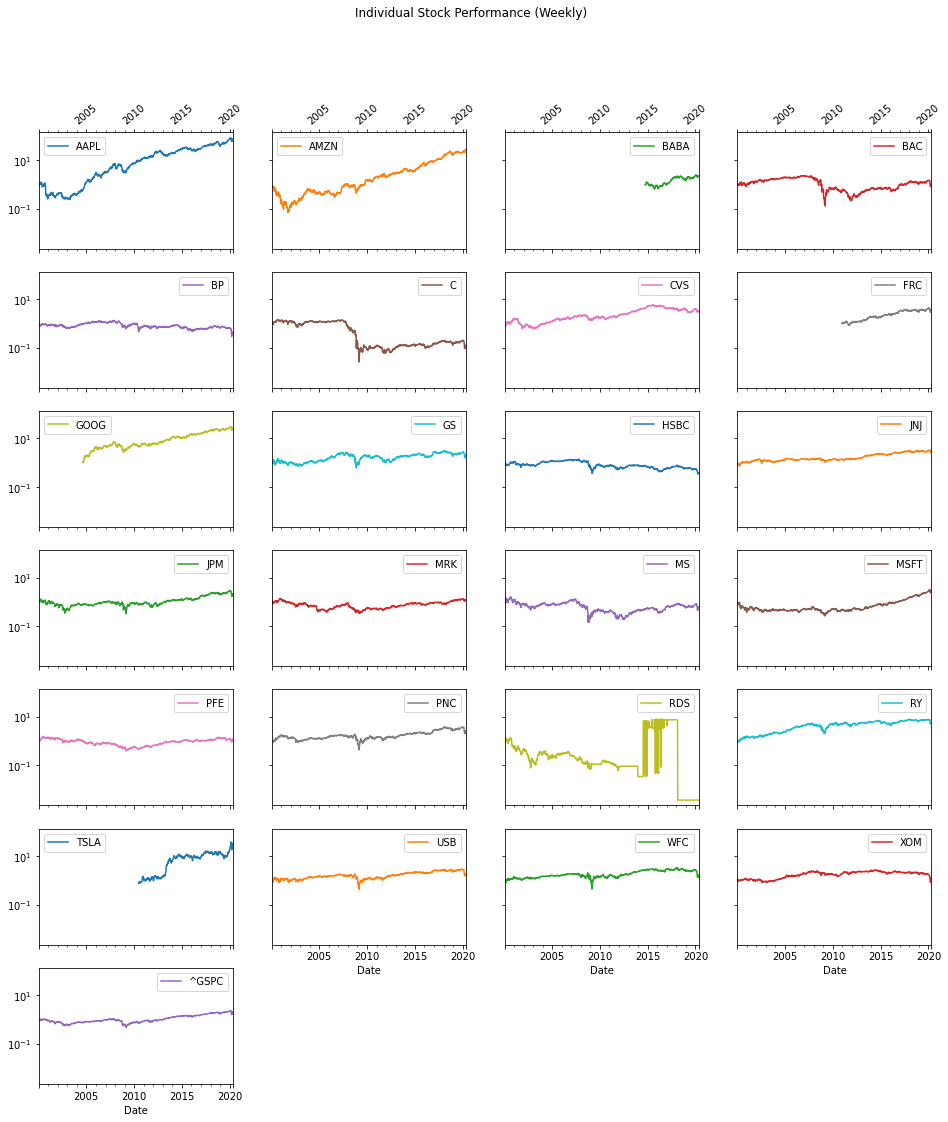

In [49]:
## Plot the individual stock performance (or cumulative return)

col = 4
row = int(np.ceil(len(Names)/col))
f_hei = row * 2.5
f_wid = col * 4
ax = (data_weekly+1).cumprod().plot(subplots=True, layout=(row, col), figsize=(f_wid, f_hei),
                                    logy=True, sharey=True, sharex=True, 
                                    title = 'Individual Stock Performance (Weekly)')
for i in range(col):
    ax[0,i].xaxis.set_tick_params(which='both', top = True, labeltop=True, labelrotation=40)
plt.show()

In [50]:
## Read and Edit data into the right format
file_name = 'WTB3MS.csv'
df = pd.read_csv(file_name)

df['DATE']=pd.to_datetime(df['DATE'])
df['WTB3MS'] = pd.to_numeric(df['WTB3MS'], errors='coerce')

RET_data=pd.DataFrame(columns=['RET'], index=df.DATE)
RET_data['RET'] = (df['WTB3MS'].values/100 + 1) ** (1/52) - 1 # Edit the unit of the return data

RET_data_weekly = (RET_data['RET']+1).resample('W').prod() - 1 # Convert the data to the same weekly frequency as above
TBill = pd.DataFrame(columns=['T-Bill'], index=RET_data_weekly.index)
TBill['T-Bill'] = RET_data_weekly

TBill

,T-Bill
DATE,
1954-01-10,0.000248
1954-01-17,0.000245
1954-01-24,0.000212
1954-01-31,0.000193
1954-02-07,0.000189
...,...
2020-05-31,0.000029
2020-06-07,0.000029
2020-06-14,0.000033


In [51]:
file_name = 'dataset_summary.xlsx'
sheet_name = 'CRSP'
firms_CRSP = pd.read_excel(file_name, sheet_name)
firms_CRSP

,Ticker,Name,Sector,PERMNO
0,FRC,First Republic,Bank,12448
1,PNC,PNC Financial,Bank,60442
2,USB,US Bancorp,Bank,66157
3,JPM,JPMorgan Chase,Bank,47896
4,BAC,Bank of America,Bank,59408
5,C,Citigroup,Bank,70519
6,RY,Royal Bank of Canada,Bank,82654
7,WFC,Wells Fargo,Bank,38703
8,GS,Goldman Sachs,Bank,86868
9,MS,Morgan Stanley,Bank,69032


In [52]:
firms_CRSP.drop(columns = 'PERMNO', inplace = True) # Dropping the PERMNO column
firms_CRSP = firms_CRSP.set_index('Ticker') # Set Ticker as the index of the dataframe
firms_CRSP

,Name,Sector
Ticker,,
FRC,First Republic,Bank
PNC,PNC Financial,Bank
USB,US Bancorp,Bank
JPM,JPMorgan Chase,Bank
BAC,Bank of America,Bank
C,Citigroup,Bank
RY,Royal Bank of Canada,Bank
WFC,Wells Fargo,Bank
GS,Goldman Sachs,Bank


In [55]:
df2 = pd.DataFrame({'Ticker': ['SP500'], 'Name':['S&P 500'], 'Sector':['Market Index']})
df2 = df2.set_index('Ticker')

df3 = pd.DataFrame({'Ticker': ['AMZN'], 'Name':['AMAZON'], 'Sector':['Tech']})
df3 = df3.set_index('Ticker')

df4 = pd.DataFrame({'Ticker': ['TSLA'], 'Name':['TESLA'], 'Sector':['Energy']})
df4 = df4.set_index('Ticker')

firms_CRSP = firms_CRSP.append(df2, sort = 'False') 
 

firms_CRSP

,Name,Sector
Ticker,,
FRC,First Republic,Bank
PNC,PNC Financial,Bank
USB,US Bancorp,Bank
JPM,JPMorgan Chase,Bank
BAC,Bank of America,Bank
C,Citigroup,Bank
RY,Royal Bank of Canada,Bank
WFC,Wells Fargo,Bank
GS,Goldman Sachs,Bank


In [56]:
firms_CRSP = firms_CRSP.append(df3, sort = 'False') 
firms_CRSP = firms_CRSP.append(df4, sort = 'False')

In [57]:
firms_CRSP

,Name,Sector
Ticker,,
FRC,First Republic,Bank
PNC,PNC Financial,Bank
USB,US Bancorp,Bank
JPM,JPMorgan Chase,Bank
BAC,Bank of America,Bank
C,Citigroup,Bank
RY,Royal Bank of Canada,Bank
WFC,Wells Fargo,Bank
GS,Goldman Sachs,Bank


In [58]:
data_weekly.drop(data_weekly.index[0], inplace = True)
#Dropping the last row since it only has two days (2020-06-29,2020-06-30) of return rather than a whole-week return 
data_weekly.drop(data_weekly.index[-1], inplace = True)
data_weekly

,AAPL,AMZN,BABA,BAC,BP,C,CVS,FRC,GOOG,GS,...,MSFT,PFE,PNC,RDS,RY,TSLA,USB,WFC,XOM,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-16,0.009422,-0.076370,NaN,0.037227,-0.070378,0.074074,-0.046512,NaN,NaN,0.037093,...,0.007291,0.072464,0.085631,0.027027,-0.017751,NaN,0.072046,0.065495,-0.013981,0.016428
2000-01-23,0.108277,-0.034047,NaN,-0.095297,0.016949,-0.026940,-0.038328,NaN,NaN,0.000730,...,-0.075724,-0.052365,-0.061497,0.210526,-0.048193,NaN,-0.067204,-0.121439,0.014925,-0.016237
2000-01-30,-0.087030,-0.006042,NaN,0.001368,-0.041111,-0.005537,0.009058,NaN,NaN,0.015317,...,-0.053012,0.003565,0.045584,-0.019565,0.068038,NaN,0.025937,0.058020,-0.072059,-0.056336
2000-02-06,0.062731,0.273556,NaN,0.002732,-0.086906,-0.024499,0.048474,NaN,NaN,-0.026580,...,0.084606,0.015986,-0.028610,-0.024390,-0.054815,NaN,0.002809,-0.004839,0.025357,0.047208
2000-02-13,0.006944,-0.030231,NaN,-0.014986,-0.053299,-0.013699,0.085616,NaN,NaN,0.005166,...,-0.062170,-0.020979,-0.054698,0.052273,0.018809,NaN,-0.005602,-0.017828,-0.086553,-0.026152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-29,0.080701,0.029256,0.040210,0.098119,0.285221,0.150814,0.071298,0.034812,0.035801,0.143992,...,0.089916,0.065150,0.118896,0.000000,0.082003,0.203097,0.098250,0.142642,0.128589,0.102628
2020-04-05,-0.025551,0.003416,-0.007848,-0.072685,0.106040,-0.144064,-0.049147,-0.006801,-0.011551,-0.072060,...,0.027589,0.088673,-0.149206,0.000000,-0.017124,-0.066782,-0.128040,-0.133752,0.061164,-0.020783
2020-04-12,0.110103,0.071421,0.049490,0.241138,0.007282,0.264604,0.085248,0.216679,0.103445,0.254067,...,0.073523,0.052021,0.237469,0.000000,0.088667,0.193725,0.219942,0.265726,0.099975,0.121017


In [59]:

start_date = data_weekly.index[0]
end_date = data_weekly.index[-1]
TBill = TBill[TBill.index >= start_date] # To match the start date of the Stock Return data
TBill = TBill[TBill.index <= end_date]   # To match the end date of the Stock Return data
TBill

,T-Bill
DATE,
2000-01-16,0.000986
2000-01-23,0.000995
2000-01-30,0.001014
2000-02-06,0.001030
2000-02-13,0.001028
...,...
2020-03-29,-0.000002
2020-04-05,0.000019
2020-04-12,0.000037


In [61]:
writer = pd.ExcelWriter('CleanedData_Weekly.xlsx', engine='xlsxwriter')

firms_CRSP.to_excel(writer, sheet_name='Firms Info')
data_weekly.to_excel(writer, sheet_name='Stock Returns')
TBill.to_excel(writer, sheet_name='T-Bill')

writer.save()

In [63]:
# Import all the necessary packages

import numpy as np #for numerical array data
import pandas as pd #for tabular data
import matplotlib.pyplot as plt #for plotting purposes
import csv
from datetime import datetime, timedelta

from sklearn import cluster, covariance, manifold
from matplotlib.collections import LineCollection #for plotting purposes

import warnings
warnings.filterwarnings('ignore')

In [64]:
# Import the self-defined function from the python file
from Graphical_Analysis_functions import *

In [65]:
firms_info

,Name,Sector
Ticker,,
FRC,First Republic,Bank
PNC,PNC Financial,Bank
USB,US Bancorp,Bank
JPM,JPMorgan Chase,Bank
BAC,Bank of America,Bank
C,Citigroup,Bank
RY,Royal Bank of Canada,Bank
WFC,Wells Fargo,Bank
GS,Goldman Sachs,Bank


In [66]:
Sectors = firms_info.Sector.unique()
print(Sectors)

['Bank' 'Health' 'Energy' 'Tech' 'Market Index']


In [67]:
# Load Stock Return dataset 
file_name = 'CleanedData_Weekly.xlsx'
sheet_name = 'Stock Returns'
df = pd.read_excel(file_name, sheet_name, index_col=0)
df.index=pd.to_datetime(df.index)    
data = df.copy()

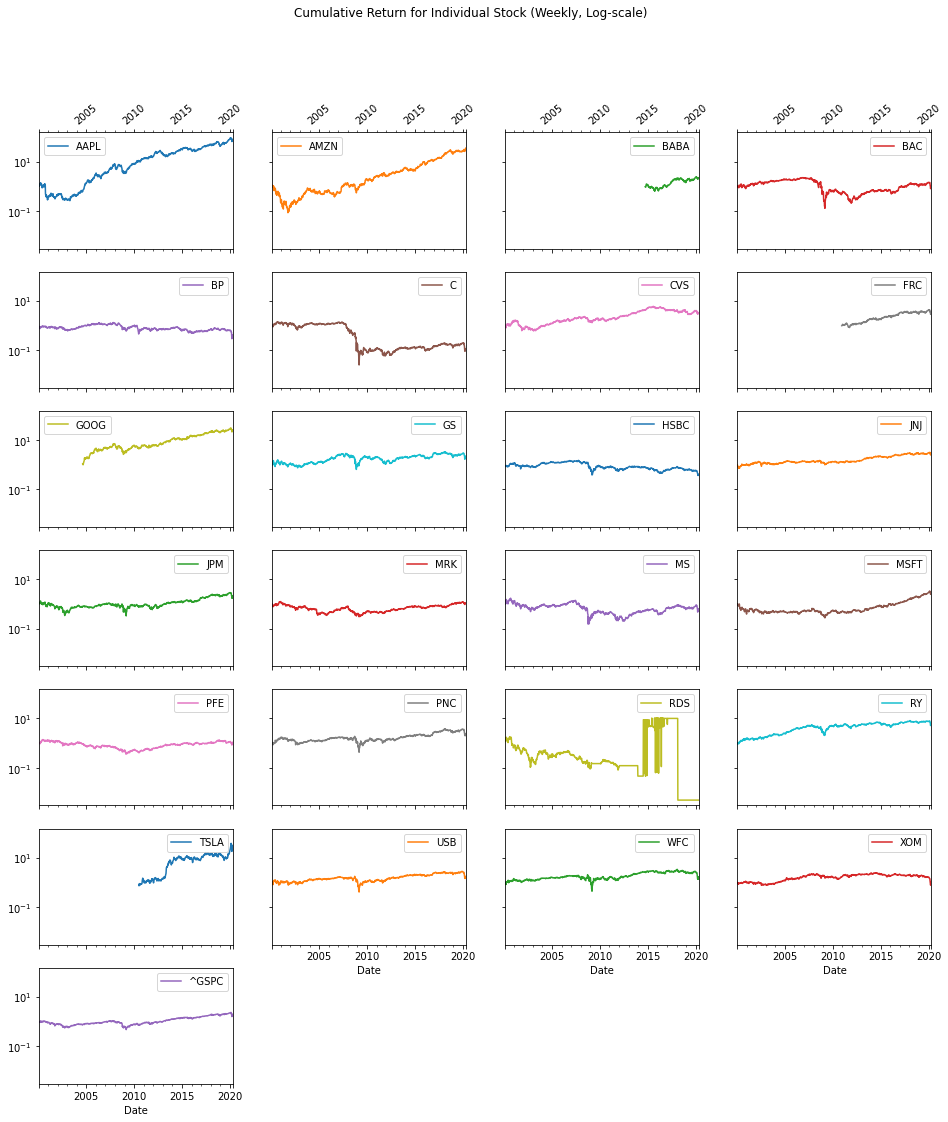

In [68]:
# Plot cumulative return for each firm
lo_col = 4
lo_row = int(np.ceil(len(df.columns)/4))
f_hei = lo_row * 2.5
f_wid = lo_col * 4
ax = (data+1).cumprod().plot(subplots=True, layout=(lo_row, lo_col), figsize=(f_wid, f_hei),
                             logy=True, sharex=True, sharey=True,
                             title='Cumulative Return for Individual Stock (Weekly, Log-scale)');
for i in range(lo_col):
    ax[0,i].xaxis.set_tick_params(which='both', top = True, labeltop=True, labelrotation=40)
plt.show()

In [69]:
getSumStat(data)

Summary Statistic Information from 01/10/2000 to 04/26/2020:
Dropping firms: 
BABA
FRC
GOOG
TSLA


,Sector,Total Return(%),Ave Return(%),Annu. Ave Return(%),Annu. Std(%),Annu. Sharpe Ratio,Max Drawdown(%)
AAPL,Tech,7862.97,0.56,3.394000e+01,38.47,8.300000e-01,-81.08
AMZN,Tech,3364.83,0.57,3.473000e+01,50.79,6.400000e-01,-92.40
BAC,Bank,-8.89,0.18,1.007000e+01,45.92,1.800000e-01,-94.28
BP,Energy,-60.69,-0.01,-7.700000e-01,27.43,-9.000000e-02,-77.82
C,Bank,-89.36,0.05,2.620000e+00,53.66,2.000000e-02,-98.21
CVS,Energy,231.22,0.19,1.039000e+01,28.04,3.100000e-01,-63.27
GS,Bank,114.38,0.20,1.092000e+01,36.79,2.500000e-01,-77.40
HSBC,Bank,-62.12,-0.03,-1.300000e+00,26.04,-1.100000e-01,-75.35
JNJ,Health,220.95,0.14,7.790000e+00,18.85,3.200000e-01,-35.57
JPM,Bank,87.03,0.19,1.040000e+01,37.25,2.300000e-01,-75.16


In [72]:
###########################################   CAN BE CHANGED  #############################################

## Start and End date we are considering:
start_date = '2020-01-01'
end_date   = '2020-06-28'

## Sectors which we will be testing:
Sectors_chosen = ['Bank','Health','Energy','Tech']

## The list of firms we want to drop:
drop_firm = ['RDS']

## Whether we want to display the summary statisitcs and/or individual firm performance:
display_SumStat = True
display_IndRet = True

###########################################   CAN BE CHANGED  #############################################

Results over the time period  2020-01-01  to  2020-06-28 :

The "end_date" is adjusted to the lastest end_date, i.e.  2020-04-26

Sectors choosen in the Graphical Analysis are:
['Bank', 'Health', 'Energy', 'Tech']

The following Firms are dropped:
['RDS']

Number of firms examined: 23
Cluster 1: FRC, PNC, USB, JPM, BAC, C, WFC, GS, MS, HSBC
Cluster 2: JNJ, PFE, MRK
Cluster 3: XOM, BP
Cluster 4: RY, CVS, TSLA, AAPL, GOOG, MSFT, BABA
Cluster 5: AMZN


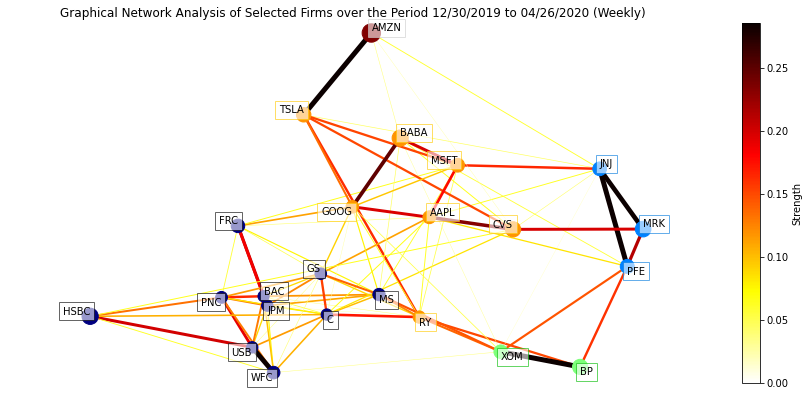

Individual Stock Performance over the Period 12/30/2019 to 04/26/2020 (Weekly):


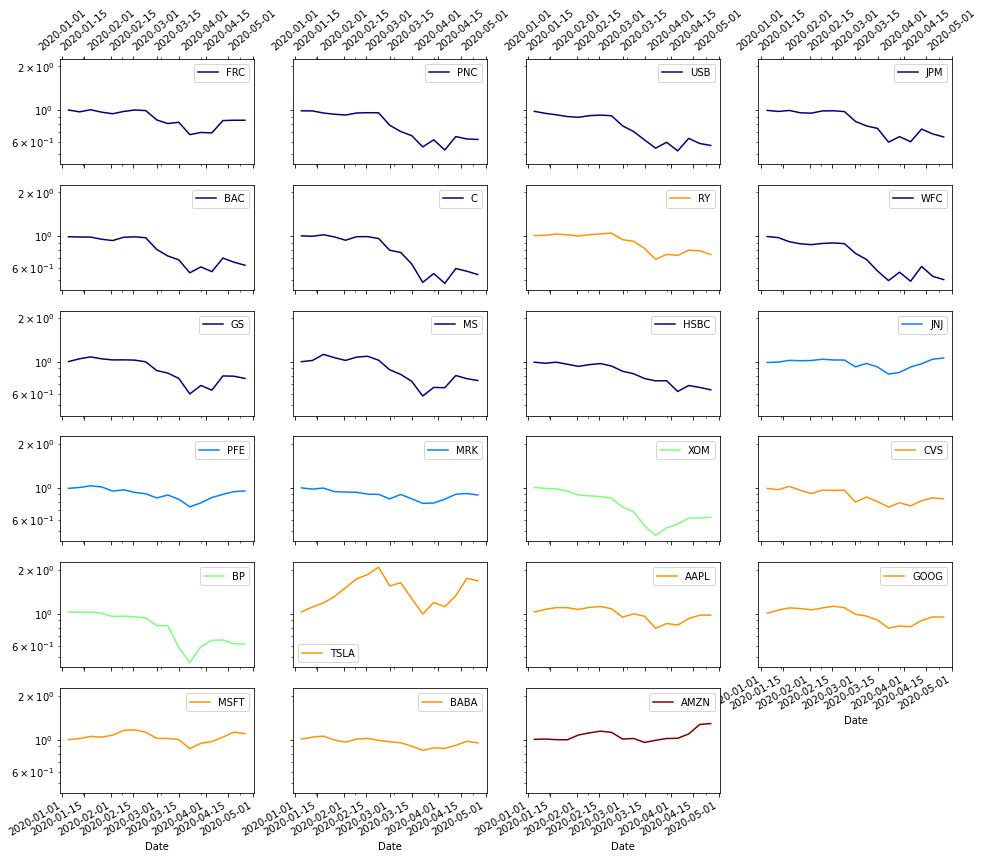

Summary Statistic Information from 12/30/2019 to 04/26/2020:


,Sector,Total Return(%),Ave Return(%),Annu. Ave Return(%),Annu. Std(%),Annu. Sharpe Ratio,Max Drawdown(%)
FRC,Bank,-14.97,-0.63,-28.12,59.20,-0.50,-32.67
PNC,Bank,-37.36,-2.25,-69.34,72.16,-0.99,-46.36
USB,Bank,-43.08,-2.88,-78.16,65.34,-1.24,-46.69
JPM,Bank,-34.81,-2.10,-66.75,65.85,-1.05,-39.64
BAC,Bank,-37.26,-2.26,-69.59,70.38,-1.02,-43.64
C,Bank,-45.90,-2.85,-77.76,87.43,-0.92,-53.78
RY,Bank,-25.53,-1.53,-55.04,45.29,-1.26,-34.02
WFC,Bank,-50.07,-3.45,-83.88,79.76,-1.09,-50.90
GS,Bank,-23.26,-1.06,-42.55,73.80,-0.60,-44.52
MS,Bank,-25.68,-1.23,-47.58,74.06,-0.67,-48.41


In [73]:
print('Results over the time period ', start_date, ' to ', end_date, ':')
print()

# Output the Clustering information, graphical network plot, 
# as well as summary statistics (optional) and the individual firm performance (optional)
# Store the correlation matrix and precision matrix in "est" (stands for estimates)
# Store the plotting configuration information in "con_fig" which will be needed if we want to use the ZOOM functions
## Note: you can view the correlation matrix by looking at est[0] and view the precision matrix by looking at est[1] 
est, con_fig = graphicalAnalysis(data, start_date, end_date, 
                                 Sectors_chosen, drop_firm, 
                                 display_SumStat, display_IndRet)

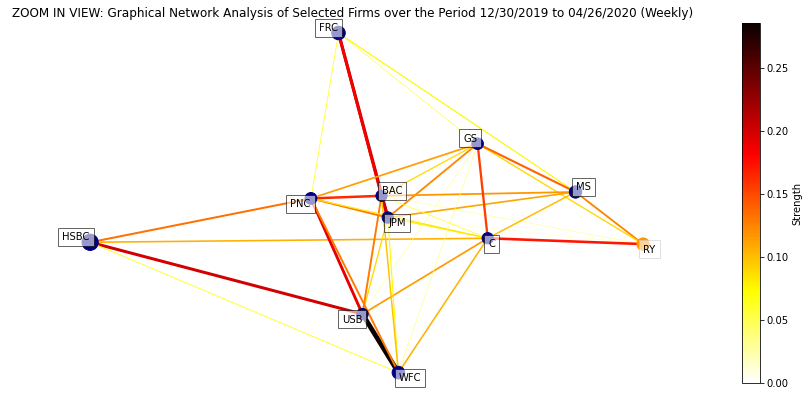

In [74]:
Sectors_list = ['Bank']

graphicalAnalysis_plot_ZOOM_bySector(Sectors_list, con_fig)

ZOOM IN View of the Selected Firms:
['FRC', 'JPM', 'BAC', 'GS', 'MS', 'PNC', 'C']


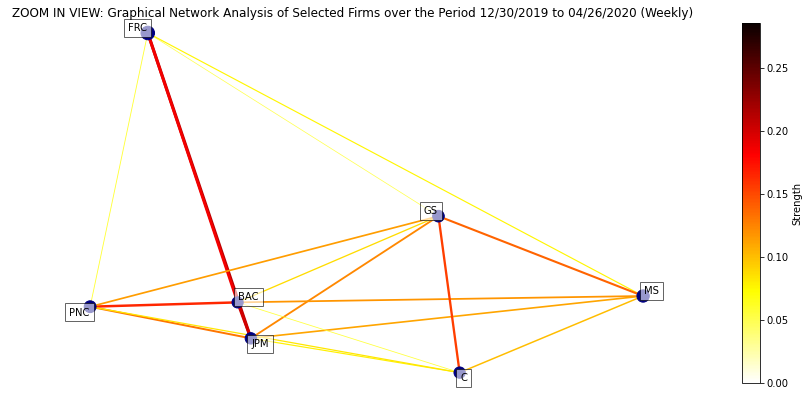

In [75]:
firms_list = ['FRC','JPM','BAC', 'GS', 'MS', 'PNC','C']
print('ZOOM IN View of the Selected Firms:')
print(firms_list)
graphicalAnalysis_plot_ZOOM_byFirm(firms_list, con_fig)

In [80]:
###########################################   CAN BE CHANGED  #############################################

## Start and End date we are considering:
start_date = '2015-07-01'
end_date   = '2020-06-28'

## Sectors which we will be testing:
Sectors_chosen = ['Bank','Health','Energy','Tech']

## The list of firms we want to drop:
drop_firm = ['RDS']

## Whether we want to display the summary statisitcs and/or individual firm performance:
display_SumStat = True
display_IndRet = True

###########################################   CAN BE CHANGED  #############################################

Results over the time period  2015-07-01  to  2020-06-28 :

The "end_date" is adjusted to the lastest end_date, i.e.  2020-04-26

Sectors choosen in the Graphical Analysis are:
['Bank', 'Health', 'Energy', 'Tech']

The following Firms are dropped:
['RDS']

Number of firms examined: 23
Cluster 1: FRC, PNC, USB, JPM, BAC, C, RY, WFC, GS, MS, HSBC
Cluster 2: JNJ, PFE, MRK
Cluster 3: CVS
Cluster 4: XOM, BP
Cluster 5: TSLA
Cluster 6: AAPL, GOOG, MSFT, BABA, AMZN


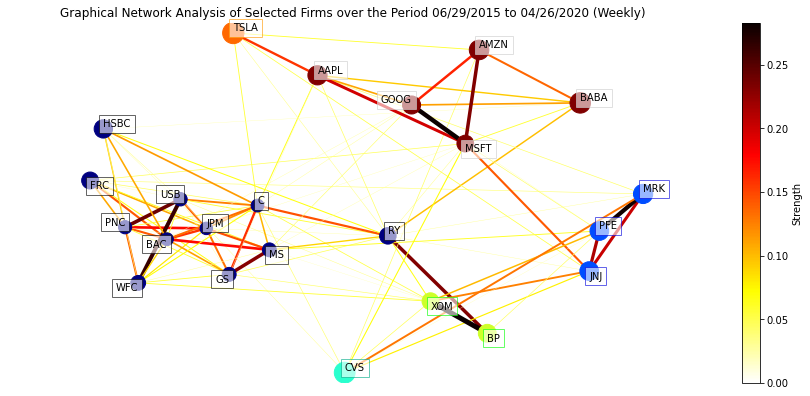

Individual Stock Performance over the Period 06/29/2015 to 04/26/2020 (Weekly):


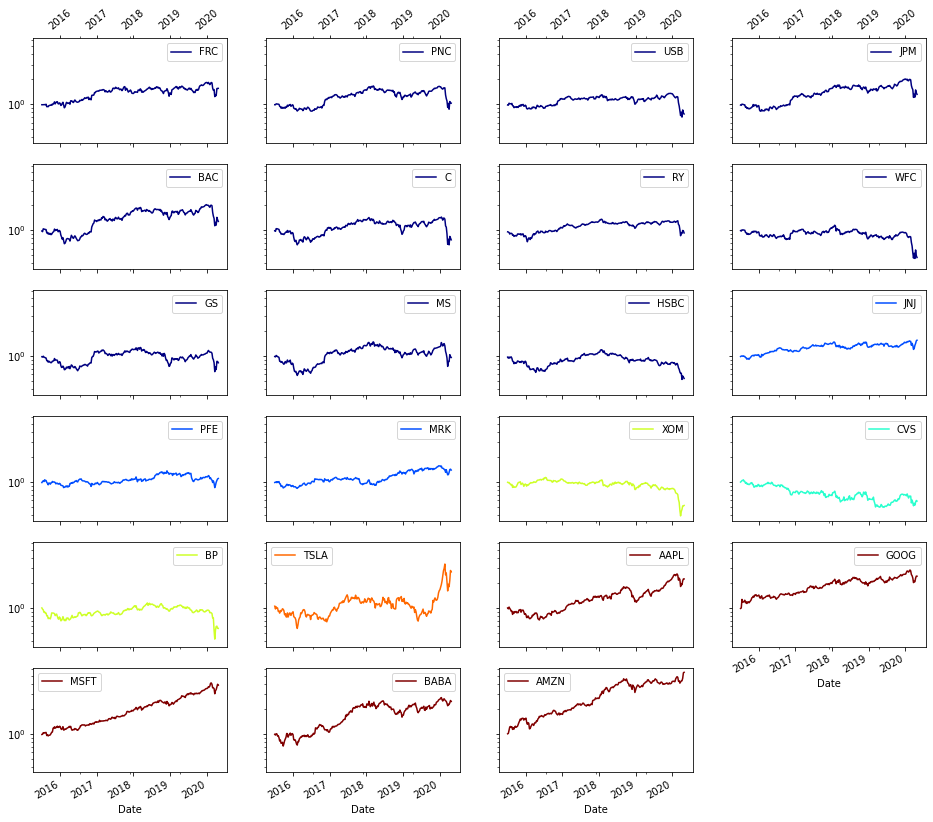

Summary Statistic Information from 06/29/2015 to 04/26/2020:


,Sector,Total Return(%),Ave Return(%),Annu. Ave Return(%),Annu. Std(%),Annu. Sharpe Ratio,Max Drawdown(%)
FRC,Bank,55.53,0.25,13.73,27.54,0.45,-32.67
PNC,Bank,3.19,0.09,4.65,27.90,0.12,-47.56
USB,Bank,-23.61,-0.05,-2.43,24.90,-0.14,-48.25
JPM,Bank,31.56,0.18,9.65,26.66,0.32,-39.99
BAC,Bank,27.40,0.19,10.65,32.10,0.29,-44.36
C,Bank,-23.50,0.00,0.17,33.50,-0.03,-53.78
RY,Bank,-7.36,0.01,0.38,19.59,-0.04,-36.71
WFC,Bank,-53.13,-0.21,-10.53,30.07,-0.38,-60.22
GS,Bank,-16.97,0.02,0.89,30.91,-0.01,-48.88
MS,Bank,-3.87,0.08,4.46,32.21,0.10,-49.43


In [81]:
print('Results over the time period ', start_date, ' to ', end_date, ':')
print()
est, con_fig = graphicalAnalysis(data, start_date, end_date, 
                                 Sectors_chosen, drop_firm, 
                                 display_SumStat, display_IndRet)